In [182]:
from pandas import read_csv, isna, to_datetime, merge, concat
import numpy as np 
from matplotlib import pyplot as plt
from datetime import datetime

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error


In [183]:
dataframes = []
dataframes.append(read_csv("data/atp_matches_2021.csv"))
dataframes.append(read_csv("data/atp_matches_2022.csv"))
dataframes.append(read_csv("data/atp_matches_2023.csv"))
dataframes.append(read_csv("data/atp_matches_2024.csv"))



# Data cleaning

In [184]:
# remove NaNs
for df in dataframes:
    df["w_1stIn"].fillna((df["w_1stIn"].mean()), inplace=True)
    df["l_1stIn"].fillna((df["l_1stIn"].mean()), inplace=True)


/tmp/ipykernel_7829/98200603.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["w_1stIn"].fillna((df["w_1stIn"].mean()), inplace=True)
/tmp/ipykernel_7829/98200603.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [185]:
# split date into year, month, day
for df in dataframes:
    for idx, el in enumerate(df["tourney_date"]):
        df.loc[idx, "year"] = int(str(el)[:4])
        df.loc[idx, "month"] = int(str(el)[4:6])
        df.loc[idx, "day"] = int(str(el)[6:8])
    df['date'] = to_datetime(df[['year', 'month', 'day']])
    df = df.drop("tourney_date", axis=1)
    df = df.drop("month", axis=1)
    df = df.drop("day", axis=1)


data = concat(dataframes, axis=0)
data = data.sort_values(by="date", axis=0)


# Data analysis

### Win rate

In [186]:
# filter matches to select only those with desired player
data_w_sinner = data.loc[data["winner_name"] == "Jannik Sinner"]
data_l_sinner = data.loc[data["loser_name"] == "Jannik Sinner"]
data_w_alcaraz = data.loc[data["winner_name"] == "Carlos Alcaraz"]
data_l_alcaraz = data.loc[data["loser_name"] == "Carlos Alcaraz"]
data_w_djokovic = data.loc[data["winner_name"] == "Novak Djokovic"]
data_l_djokovic = data.loc[data["loser_name"] == "Novak Djokovic"]

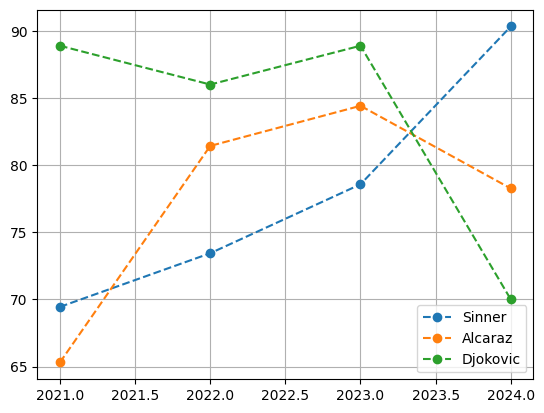

In [187]:
data_w_2021 = data_w_sinner.loc[data_w_sinner["year"] == 2021]
data_w_2022 = data_w_sinner.loc[data_w_sinner["year"] == 2022]
data_w_2023 = data_w_sinner.loc[data_w_sinner["year"] == 2023]
data_w_2024 = data_w_sinner.loc[data_w_sinner["year"] == 2024]
data_l_2021 = data_l_sinner.loc[data_l_sinner["year"] == 2021]
data_l_2022 = data_l_sinner.loc[data_l_sinner["year"] == 2022]
data_l_2023 = data_l_sinner.loc[data_l_sinner["year"] == 2023]
data_l_2024 = data_l_sinner.loc[data_l_sinner["year"] == 2024]
winrate = []
winrate.append(data_w_2021.shape[0] / (data_w_2021.shape[0] + data_l_2021.shape[0]) * 100)
winrate.append(data_w_2022.shape[0] / (data_w_2022.shape[0] + data_l_2022.shape[0]) * 100)
winrate.append(data_w_2023.shape[0] / (data_w_2023.shape[0] + data_l_2023.shape[0]) * 100)
winrate.append(data_w_2024.shape[0] / (data_w_2024.shape[0] + data_l_2024.shape[0]) * 100)
plt.plot(range(2021, 2025), winrate, 'o--', label="Sinner")

data_w_2021 = data_w_alcaraz.loc[data_w_alcaraz["year"] == 2021]
data_w_2022 = data_w_alcaraz.loc[data_w_alcaraz["year"] == 2022]
data_w_2023 = data_w_alcaraz.loc[data_w_alcaraz["year"] == 2023]
data_w_2024 = data_w_alcaraz.loc[data_w_alcaraz["year"] == 2024]
data_l_2021 = data_l_alcaraz.loc[data_l_alcaraz["year"] == 2021]
data_l_2022 = data_l_alcaraz.loc[data_l_alcaraz["year"] == 2022]
data_l_2023 = data_l_alcaraz.loc[data_l_alcaraz["year"] == 2023]
data_l_2024 = data_l_alcaraz.loc[data_l_alcaraz["year"] == 2024]
winrate = []
winrate.append(data_w_2021.shape[0] / (data_w_2021.shape[0] + data_l_2021.shape[0]) * 100)
winrate.append(data_w_2022.shape[0] / (data_w_2022.shape[0] + data_l_2022.shape[0]) * 100)
winrate.append(data_w_2023.shape[0] / (data_w_2023.shape[0] + data_l_2023.shape[0]) * 100)
winrate.append(data_w_2024.shape[0] / (data_w_2024.shape[0] + data_l_2024.shape[0]) * 100)
plt.plot(range(2021, 2025), winrate, 'o--', label="Alcaraz")

data_w_2021 = data_w_djokovic.loc[data_w_djokovic["year"] == 2021]
data_w_2022 = data_w_djokovic.loc[data_w_djokovic["year"] == 2022]
data_w_2023 = data_w_djokovic.loc[data_w_djokovic["year"] == 2023]
data_w_2024 = data_w_djokovic.loc[data_w_djokovic["year"] == 2024]
data_l_2021 = data_l_djokovic.loc[data_l_djokovic["year"] == 2021]
data_l_2022 = data_l_djokovic.loc[data_l_djokovic["year"] == 2022]
data_l_2023 = data_l_djokovic.loc[data_l_djokovic["year"] == 2023]
data_l_2024 = data_l_djokovic.loc[data_l_djokovic["year"] == 2024]
winrate = []
winrate.append(data_w_2021.shape[0] / (data_w_2021.shape[0] + data_l_2021.shape[0]) * 100)
winrate.append(data_w_2022.shape[0] / (data_w_2022.shape[0] + data_l_2022.shape[0]) * 100)
winrate.append(data_w_2023.shape[0] / (data_w_2023.shape[0] + data_l_2023.shape[0]) * 100)
winrate.append(data_w_2024.shape[0] / (data_w_2024.shape[0] + data_l_2024.shape[0]) * 100)
plt.plot(range(2021, 2025), winrate, 'o--', label="Djokovic")

plt.legend()
plt.grid()
plt.show()

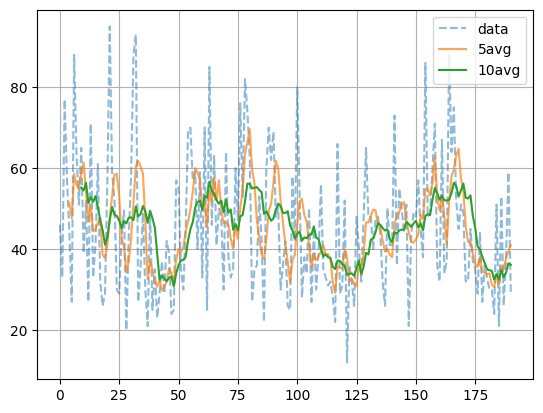

In [188]:
'''yvals = list(data_w["w_1stIn"])
yvals = yvals + list(data_l["l_1stIn"])

xvals = list(data_w.index) 
xvals = xvals + list(data_l.index)
zvals = list(data_w["w_svpt"])
zvals = zvals + list(data_l["l_svpt"])

vals = [(x,y,z) for x,y,z in zip (xvals, yvals, zvals)]
vals = sorted(vals, key=lambda x: x[0])
xvals = range(len(vals))
yvals = np.array([v[1]/v[2]*100 for v in vals])
yvals[np.isnan(yvals)] = np.nanmean(yvals)'''

xvals = range(data_w.shape[0])
yvals = data_w["w_1stIn"]

plt.plot(xvals, yvals, '--', alpha=0.5, label='data')

window = 5
moving_avg = np.convolve(yvals, np.ones(window)/window, mode='valid')

plt.plot(xvals[window-1:], moving_avg,  alpha=0.7, label='5avg')

window = 10
moving_avg = np.convolve(yvals, np.ones(window)/window, mode='valid')

plt.plot(xvals[window-1:], moving_avg, label='10avg')

plt.grid()
plt.legend()
plt.show()